Elisa Stabilini - Matricola: 28326A

# Comparative analysis training REINFORCE vs DQN eith replay buffer

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pickle
import pandas as pd
import seaborn as sns


In [2]:
Data_path_DQL = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename_DQL = '_20241030_103421'

In [3]:
errors_file_DQL = Data_path_DQL + 'training_errors' + timename_DQL + '.npz'
rewards_file_DQL = Data_path_DQL + 'rewards' + timename_DQL + '.npy'
episode_length_file_DQL = Data_path_DQL + 'episode_length' + timename_DQL + '.npy'
episode_info_file_DQL = Data_path_DQL + 'episode_info' + timename_DQL + '.pkl'

In [4]:
Data_path_RE = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Data/'
TrainedRELearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Plots'
timename_RE = '_20241003_131258'

In [5]:
errors_file_RE = Data_path_RE + 'training_errors' + timename_RE + '.npz'
rewards_file_RE = Data_path_RE + 'rewards' + timename_RE + '.npy'
episode_length_file_RE = Data_path_RE + 'episode_length' + timename_RE + '.npy'
episode_info_file_RE = Data_path_RE + 'episode_info' + timename_RE + '.pkl'

### Loading data

In [6]:
# Load the numpy arrays
rewards_DQL = np.load(rewards_file_DQL)
episode_lengths_DQL = np.load(episode_length_file_DQL)

# Load the pickle file
with open(episode_info_file_DQL, 'rb') as file:
    episode_info_DQL = pickle.load(file)

In [7]:
# Load the numpy arrays
rewards_RE = np.load(rewards_file_RE)
episode_lengths_RE = np.load(episode_length_file_RE)

# Load the pickle file
with open(episode_info_file_RE, 'rb') as file:
    episode_info_RE = pickle.load(file)

In [8]:
rewards_DQ_normalized = (rewards_DQL - np.min(rewards_DQL))/(np.max(rewards_DQL)-np.min(rewards_DQL))
rewards_RE_normalized = (rewards_RE - np.min(rewards_RE))/(np.max(rewards_RE)-np.min(rewards_RE))


### Rewards comparison: standard training vs. replay buffer training

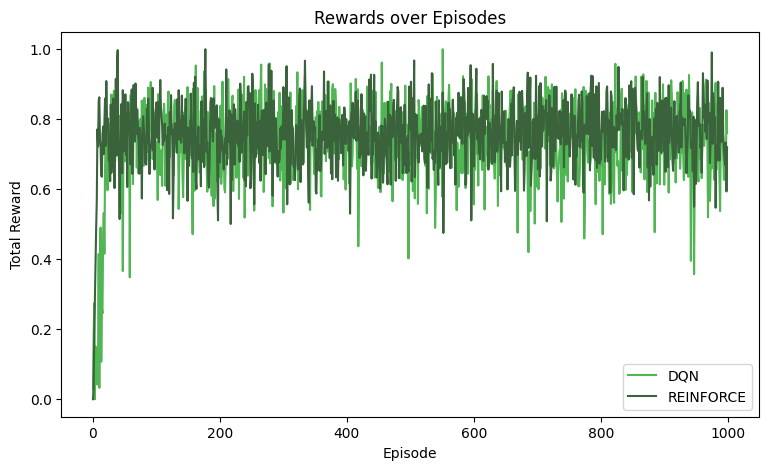

In [9]:
file_name = 'comparisonDQL_RE'

# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_DQ_normalized, label='DQN', color='#50B553') 
plt.plot(rewards_RE_normalized, label='REINFORCE', color='#3a623b')  
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)

plt.show()
 

### Dynamic plot

In [10]:
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import interactive

In [11]:
print(len(episode_info_RE))

1000


In [12]:
x = episode_info_RE[0]['year']
graphs = [episode['raw_reward'] for episode in episode_info_RE]

### Error calculation

In [13]:
errors_DQL = np.load(errors_file_DQL)

step_error_DQ = errors_DQL['step_errors']
print("Length of avg_error_RE:", len(step_error_DQ))
ep_errors_DQ = errors_DQL['episode_errors']
print("Length of all_error_RE:", len(ep_errors_DQ))

Length of avg_error_RE: 29969
Length of all_error_RE: 6707


In [14]:
avg_error_DQL = ep_errors_DQ[:6000:6]
print(len(avg_error_DQL))

1000


In [15]:
errors_RE = np.load(errors_file_RE)

avg_error_RE = errors_RE['avg_error']
print("Length of avg_error_RE:", len(avg_error_RE))
all_error_RE = errors_RE['all_errors']
print("Length of all_error_RE:", len(all_error_RE))

Length of avg_error_RE: 1000
Length of all_error_RE: 0


In [16]:
avg_error_RE = (avg_error_RE - np.min(avg_error_RE))/(np.max(avg_error_RE)-np.min(avg_error_RE))

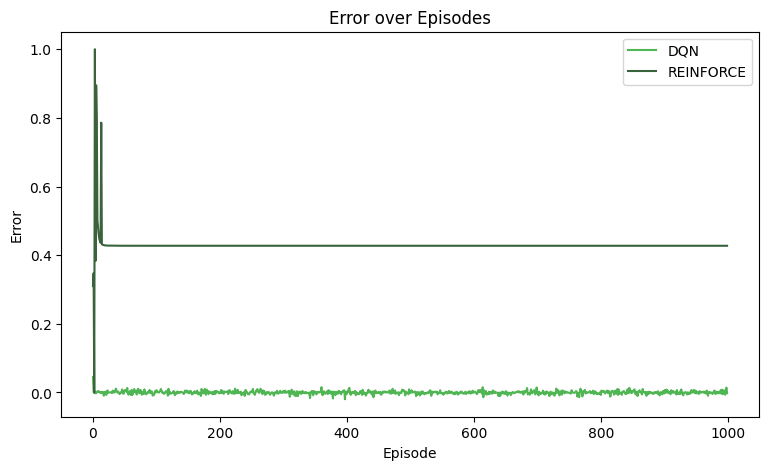

In [17]:
file_name = "REINFORCE_errorrs"

plt.figure(figsize=(9, 5))
plt.plot(avg_error_DQL, label='DQN', color='#50B553') 
plt.plot(avg_error_RE, label='REINFORCE', color='#3a623b')  

plt.title('Error over Episodes')
plt.xlabel('Episode')
plt.ylabel('Error')

# Add legend
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedRELearning_plots):
    os.makedirs(TrainedRELearning_plots)
file_path = os.path.join(TrainedRELearning_plots, imagefile)
#plt.savefig(file_path)

plt.show()

## Test for confidence plot

In [36]:

def plot_rl_comparison(reinforce_data, dqn_data):

    def prepare_data(data, algorithm_name):
        # Ensure all runs have the same length by padding with NaN if necessary
        max_length = max(len(run) for run in data)
        padded_data = []
        for run in data:
            if len(run) < max_length:
                padded_run = run + [np.nan] * (max_length - len(run))
            else:
                padded_run = run
            padded_data.append(padded_run)
            
        # Create DataFrame
        df = pd.DataFrame(padded_data).T
        df.index.name = 'Episode'
        
        # Melt the DataFrame to long format
        df_long = df.reset_index().melt(
            id_vars=['Episode'],
            var_name='Run',
            value_name='Reward'
        )
        df_long['Algorithm'] = algorithm_name
        return df_long

    reinforce_df = prepare_data(reinforce_data, 'REINFORCE')
    dqn_df = prepare_data(dqn_data, 'DQN')
    
    combined_df = pd.concat([reinforce_df, dqn_df], ignore_index=True)
    
    plt.figure(figsize=(10, 6))
    sns.set_style("white")
    
    # Create line plot with confidence interval
    ax = sns.lineplot(
        data=combined_df,
        x='Episode',
        y='Reward',
        hue='Algorithm',
        errorbar=('ci', 95),  # 95% confidence interval
        linewidth=2
    )
    
    plt.title('RL Algorithms Comparison: Average Reward per Episode with 95% CI')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    
    # Move legend to the top right corner inside the plot
    plt.legend(
        title='Algorithm',
        loc='upper right',
        bbox_to_anchor=(0.95, 0.95),
        framealpha=0.9,  # Slight transparency for the legend box
        edgecolor='white'
    )
    
    plt.tight_layout()
    
    return plt.gcf()

In [27]:

# Example usage:
example_reinforce_data = [
    [10, 15, 20, 25, 30],  # Run 1
    [12, 16, 19, 24, 28],  # Run 2
    [11, 14, 21, 26, 31]   # Run 3
]

example_dqn_data = [
    [8, 14, 22, 28, 32],   # Run 1
    [9, 15, 21, 27, 33],   # Run 2
    [7, 13, 20, 29, 34]    # Run 3
]

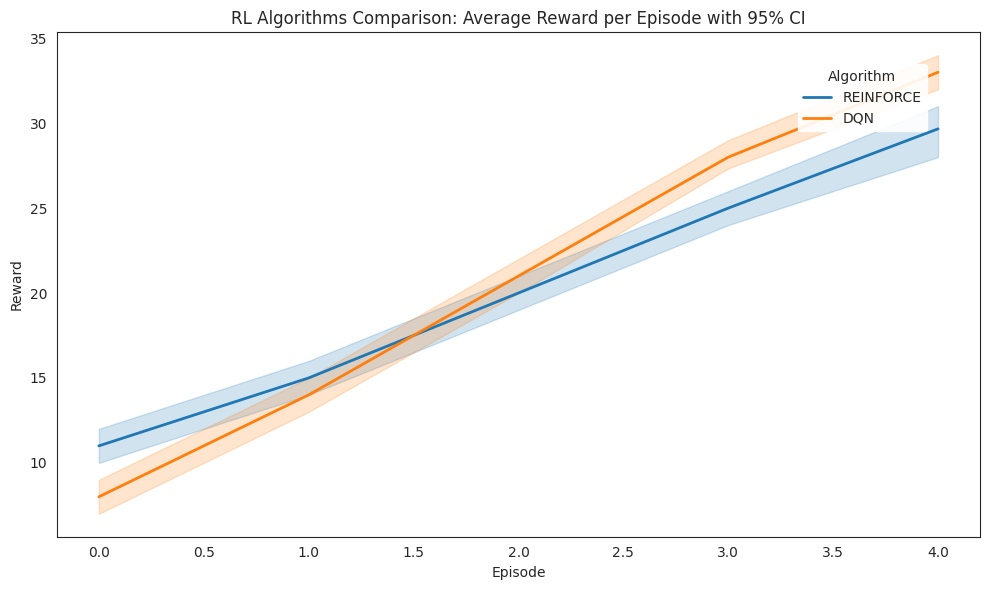

In [28]:
# Create and display the plot
fig = plot_rl_comparison(example_reinforce_data, dqn_data=example_dqn_data)

### Uploading data for REINFORCE and DQN

In [22]:
## uploading DQN
Data_path_DQ = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timenames_DQ = ['_20241010_212023', '_20241027_081302', '_20241030_103421']

rewards_files_DQ = [Data_path_DQ + 'rewards' + timename + '.npy' for timename in timenames_DQ]
print(rewards_files_DQ)


['/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/rewards_20241010_212023.npy', '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/rewards_20241027_081302.npy', '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/rewards_20241030_103421.npy']


In [23]:
#uploading REINFORCE

Data_path_RE = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Data/'
TrainedRELearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Plots'
timenames_RE = ['_20240822_161459', '_20241003_131258', '_20241028_130317'] #for last one take first 1000 (cause complete training is 5000)

rewards_files_RE = [Data_path_RE + 'rewards' + timename + '.npy' for timename in timenames_RE]

In [24]:
rewards_DQNs = [np.load(filename) for filename in rewards_files_DQ]
rewards_REs = [np.load(filename) for filename in rewards_files_RE]

In [25]:
def normalize(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

In [26]:
normalized_DQNs = [normalize(rew_DQN) for rew_DQN in rewards_DQNs]
normalized_RES = [normalize(rew_RE) for rew_RE in rewards_REs]
normalized_RES[2] = normalized_RES[2][::5]
print(len(normalized_RES[2]))

1000


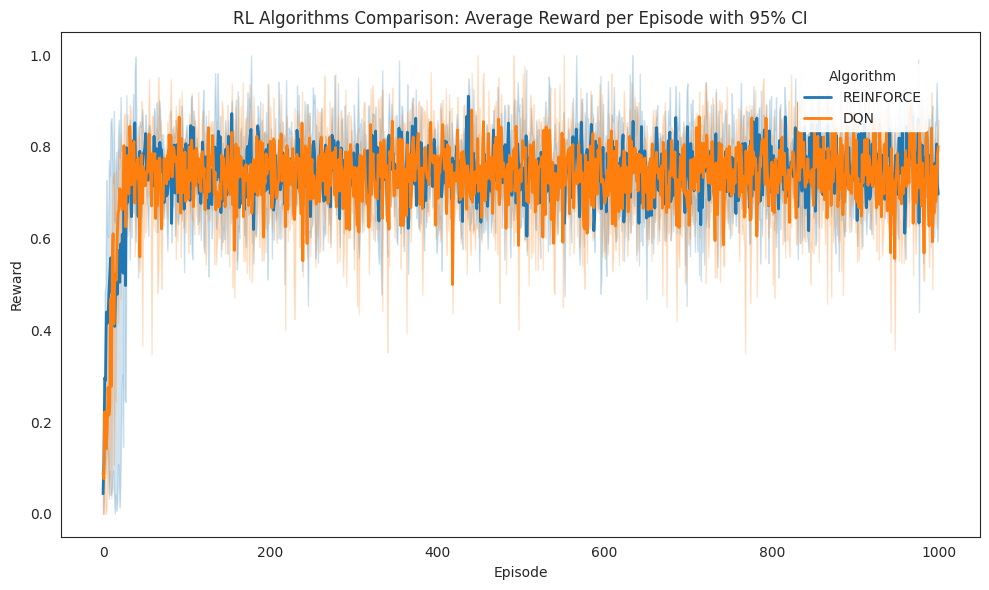

In [30]:
fig = plot_rl_comparison(normalized_RES, dqn_data=normalized_DQNs)

In [ ]:
def plot_rl_comparison(reinforce_data, dqn_data, window_size):
    """
    Create a comparison plot of REINFORCE and DQN performance with confidence intervals.
    
    Parameters:
    reinforce_data: List of lists, where each inner list contains rewards for one run
    dqn_data: List of lists, where each inner list contains rewards for one run
    window_size: Size of the rolling window for smoothing (default: 50)
    """
    custom_palette = {
        'DQN': '#50B553',      # Light green
        'REINFORCE': '#3a623b'  # Dark green
    }
    
    def prepare_data(data, algorithm_name):

        # Ensure all runs have the same length by padding with NaN if necessary
        max_length = max(len(run) for run in data)
        padded_data = []
        for run in data:
            if len(run) < max_length:
                padded_run = run + [np.nan] * (max_length - len(run))
            else:
                padded_run = run
            padded_data.append(padded_run)
            
        df = pd.DataFrame(padded_data).T
        df.index.name = 'Episode'
        
        smoothed_df = df.rolling(window=window_size, min_periods=1, center=True).mean()
        
        # Melt the DataFrame to long format
        df_long = smoothed_df.reset_index().melt(
            id_vars=['Episode'],
            var_name='Run',
            value_name='Reward'
        )
        df_long['Algorithm'] = algorithm_name
        return df_long

    reinforce_df = prepare_data(reinforce_data, 'REINFORCE')
    dqn_df = prepare_data(dqn_data, 'DQN')
    combined_df = pd.concat([reinforce_df, dqn_df], ignore_index=True)
    
    # Create the plot with adjusted figure size
    plt.figure(figsize=(10, 6))
    
    sns.set_style("white")
    
    ax = sns.lineplot(
        data=combined_df,
        x='Episode',
        y='Reward',
        hue='Algorithm',
        errorbar=('ci', 95),
        linewidth=2,
        palette=custom_palette
    )
    
    plt.title(f'RL Algorithms Comparison: Average Reward per Episode with 95% CI\n(Smoothed with {window_size}-episode window)')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    
    plt.legend(
        title='Algorithm',
        loc='lower right',
        bbox_to_anchor=(0.95, 0.0),
        framealpha=0.9,
        edgecolor='white'
    )
    
    sns.despine()
    
    plt.tight_layout()
    
    return plt.gcf()

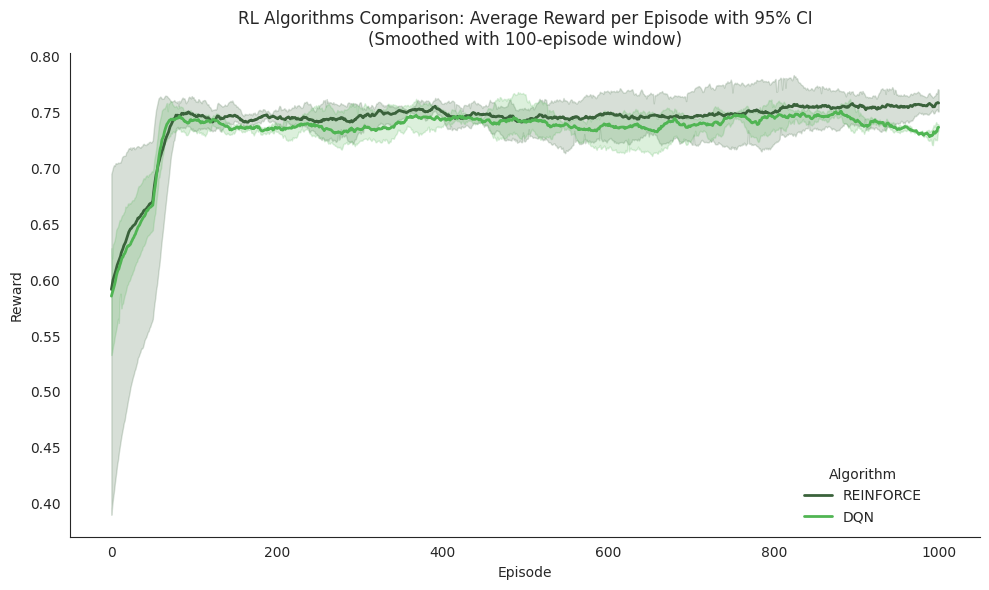

In [42]:
fig = plot_rl_comparison(normalized_RES, dqn_data=normalized_DQNs, window_size=100)


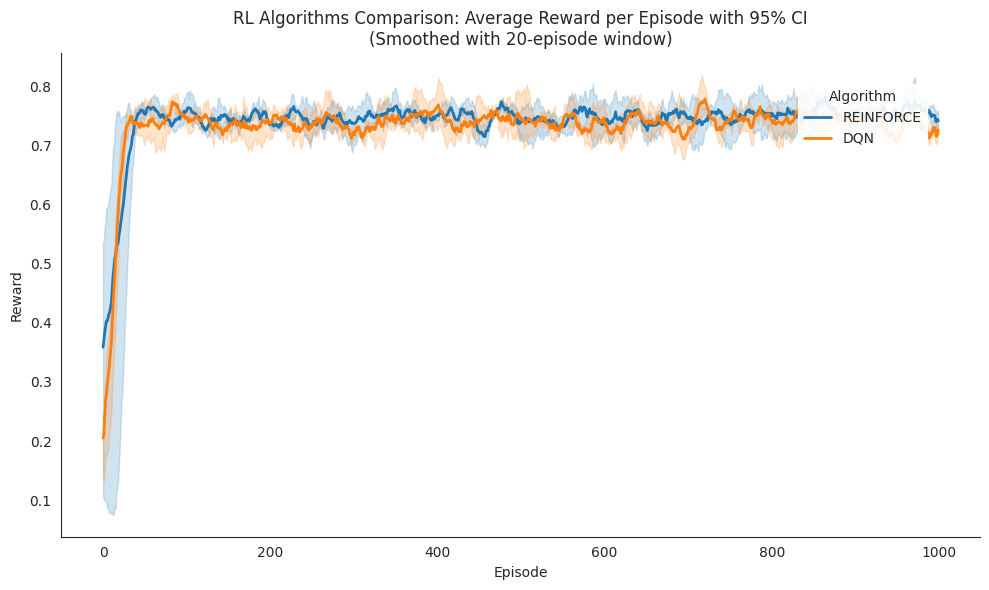

In [34]:
fig = plot_rl_comparison(normalized_RES, dqn_data=normalized_DQNs, window_size=20)
